# Demo T2 experiment analysis

This notebook contains the code to process Spinsolve T1 experiments

In [1]:
from pathlib import Path
import spinsolveproc.spinsolveproc as spinsolveproc

#### Define data filepath

In [2]:
data_filepath = Path('./data')

#### Process and plot data

In [3]:
# Define experiment filename
T2_filename = '230210-120446 T2 (fid_lyogelA)'

# Process experiment data
experiment = spinsolveproc.SpinsolveExperiment(data_filepath / T2_filename)
experiment.load()
output_dict = experiment.process(integration_width=2)
figure, experiment_name = experiment.plot(output_dict, num_exponentials=1)  # num_exponentials optional parameter, default 1
figure[0].show()  # Spectroscopically resolved T1
figure[1].show()  # T

Processing directory... 230210-120446 T2 (fid_lyogelA)... Done!! 

Peaks ppm positions:  [1.02441431]
Integration width around peak for calculating signal decay: [0.02441431] [2.02441431]
Results 1 exp. fit from plot
   Amplitude [a.u]  Err Amplitude [a.u]  Time decay [s]  Err Time decay [s]
0      1401.208138            12.674333        0.933439            0.024724


#### Save processed data

The following cell will create a processed_data directory and save the processed data there.

In [4]:
experiment.save_data(output_dict, experiment_name)

Saved datafile: T2Bulkdecay.dat

Saved datafile: T2Bulkdecay_exp_fitting.dat

Saved h5py file: T2spec_2Ddata.h5 



### Performing Inverse Laplace Transform on T2decay
The processed data can also be analysed performing an Inverse Laplace Transformation. For this, we use the flintpy library (https://github.com/rserial/flintpy)


First we load the processed data from the output dictionary. Alternatively, you can load the exported .dat file.

In [5]:
time_axis = output_dict['T2'][1]  # time axis of Inversion/Saturation Recovery
T1decay = output_dict['T2'][4]  # T1 decay

In [6]:
from flintpy import flintpy

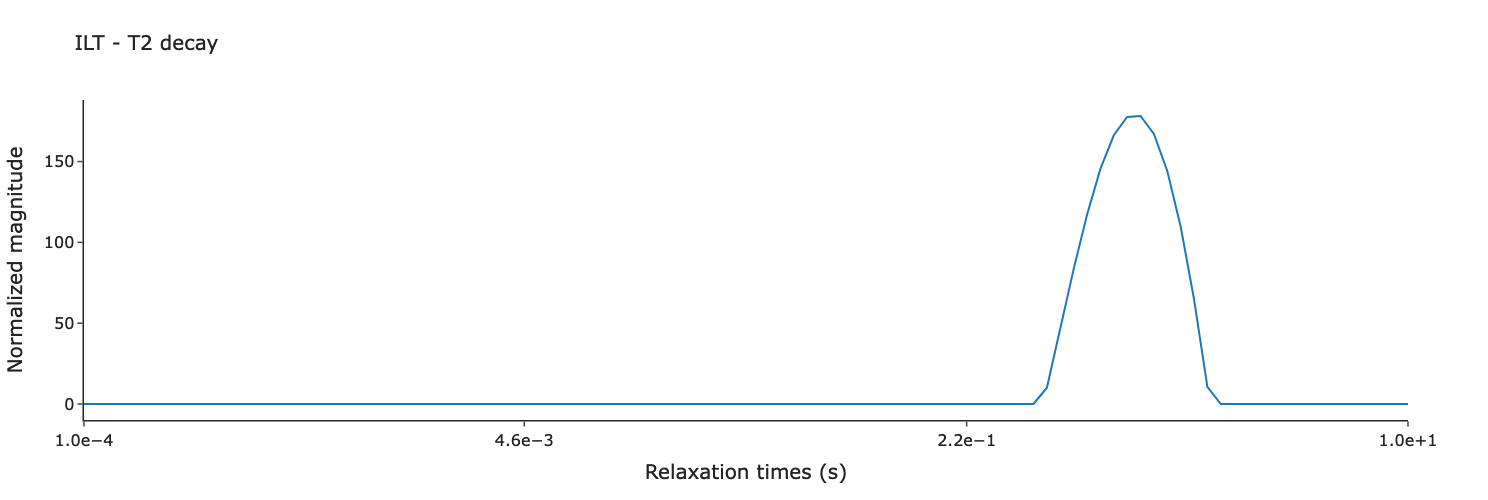

In [7]:
ilt_t1_axis_t1ir, ilt_data_t1ir = flintpy.perform_ilt_and_plot(
    T1decay,
    time_axis,  # in seconds
    dim_kernel_2d=[100, 1],
    alpha = 1e-1,
    kernel_name = "T2",
    t1_range = [1e-4, 10e0],
    t2_range = None,
    plot_title = "ILT - T2 decay"
)